In [2]:
import pandas as pd
import pickle
import cv2
import matplotlib.pyplot as plt
import preprocessing
import numpy as np

In [3]:
df = pd.read_csv("../Dataset/labels_test.csv",index_col=0)
df.head()

,Image path,Class,Weight
0,Dataset/Test/FBO1/cacao-1.jpg,FBO1,1.50
1,Dataset/Test/FBO1/cacao-2.jpg,FBO1,1.43
2,Dataset/Test/FBO1/cacao-3.jpg,FBO1,1.45
3,Dataset/Test/FBO1/cacao-4.jpg,FBO1,1.45
4,Dataset/Test/FBO1/cacao-5.jpg,FBO1,1.24


In [4]:
from tqdm import tqdm
test_data = []

for i in tqdm(range(len(df))):
    img = cv2.imread("../" + df.iloc[i]["Image path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    attr = preprocessing.extract_attributes(img)

    flattened = [item for sublist in attr for item in (sublist if isinstance(sublist, np.ndarray) else [sublist])]

    test_data.append(flattened)

test = pd.DataFrame(test_data, columns=preprocessing.get_all_columns())

test = test[preprocessing.get_columns()]
test.head()

100%|██████████| 180/180 [00:21<00:00,  8.55it/s]


,area,eccentricity,extent,GLCM Contrast,GLCM dissimilarity,GLCM homogeneity,GLCM ASM,GLCM energy,GLCM correlation,hist_r4,...,hist_v8,hist_v9,hist_v10,hist_v11,hist_v12,hist_v13,hist_v14,hist_v15,hist_v16,hist_v17
0,17535.0,0.724617,0.771346,0.952273,3.611906,0.404085,0.008753,0.093560,0.952273,0.0,...,1591.0,4320.0,5241.0,3745.0,1447.0,263.0,203.0,231.0,324.0,102.0
1,15811.0,0.784854,0.755423,0.957507,3.504364,0.395377,0.008252,0.090839,0.957507,0.0,...,1393.0,4204.0,5374.0,3212.0,556.0,202.0,194.0,240.0,249.0,17.0
2,19755.0,0.759615,0.739057,0.956669,3.846269,0.400504,0.008772,0.093658,0.956669,0.0,...,1515.0,5490.0,5637.0,4232.0,1952.0,271.0,153.0,180.0,217.0,52.0
3,15807.0,0.784169,0.736031,0.959143,3.394236,0.417254,0.009203,0.095935,0.959143,0.0,...,1692.0,3719.0,4328.0,3082.0,1545.0,327.0,198.0,249.0,211.0,4.0
4,15605.0,0.774226,0.755763,0.953216,3.605596,0.405617,0.009186,0.095843,0.953216,0.0,...,2152.0,4243.0,3592.0,3004.0,1435.0,336.0,211.0,225.0,227.0,0.0


In [5]:
import joblib


scaler = joblib.load("models/scaler.pkl")

X = scaler.transform(test)
X = pd.DataFrame(X, columns=preprocessing.get_columns())
Y = df["Class"]
classes = np.unique(Y)

In [6]:
df = X.copy()

df["Class"] = Y

df.to_csv("attributes_std_test.csv")

              precision    recall  f1-score   support

        FBO1       1.00      1.00      1.00        30
       FEAR5       1.00      1.00      1.00        30
         FEC       0.97      0.97      0.97        30
        FGI4       1.00      0.90      0.95        30
       FSA12       0.91      1.00      0.95        30
       FSV41       1.00      1.00      1.00        30

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



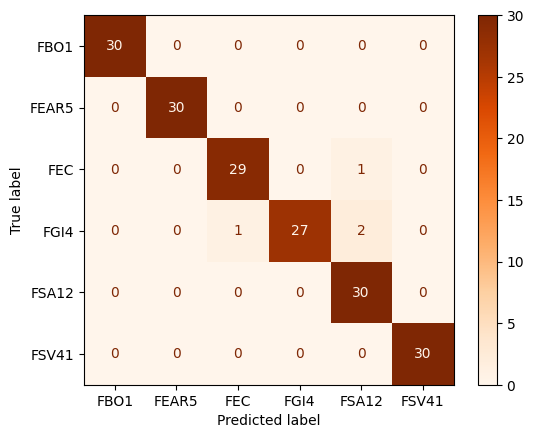

In [7]:
# SVC test

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

with open("models/svc.pkl", 'rb') as file:
    svc = pickle.load(file)

svc_predictions = svc.predict(X)

report = classification_report(Y, svc_predictions)
print(report)

cm = confusion_matrix(Y, svc_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=classes)
confusion_matrix_display.plot(cmap="Oranges")

              precision    recall  f1-score   support

        FBO1       0.94      1.00      0.97        30
       FEAR5       0.97      0.93      0.95        30
         FEC       1.00      0.97      0.98        30
        FGI4       0.97      0.93      0.95        30
       FSA12       0.91      0.97      0.94        30
       FSV41       1.00      0.97      0.98        30

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



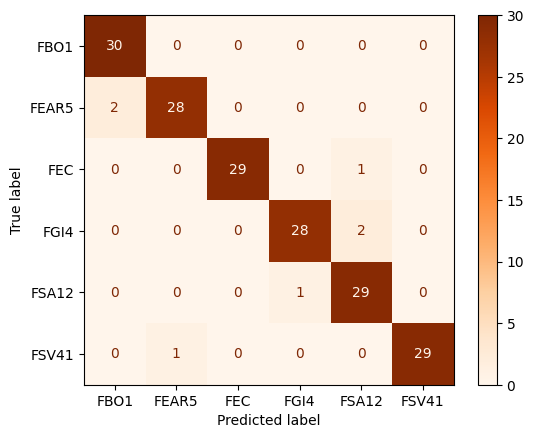

In [8]:
# Random forest test

with open("models/clf.pkl", 'rb') as file:
    clf = pickle.load(file)

clf_predictions = clf.predict(X)

report = classification_report(Y, clf_predictions)
print(report)

cm = confusion_matrix(Y, clf_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=classes)
confusion_matrix_display.plot(cmap="Oranges")

              precision    recall  f1-score   support

        FBO1       1.00      1.00      1.00        30
       FEAR5       0.88      1.00      0.94        30
         FEC       1.00      0.77      0.87        30
        FGI4       0.90      0.90      0.90        30
       FSA12       0.88      0.93      0.90        30
       FSV41       0.94      0.97      0.95        30

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180



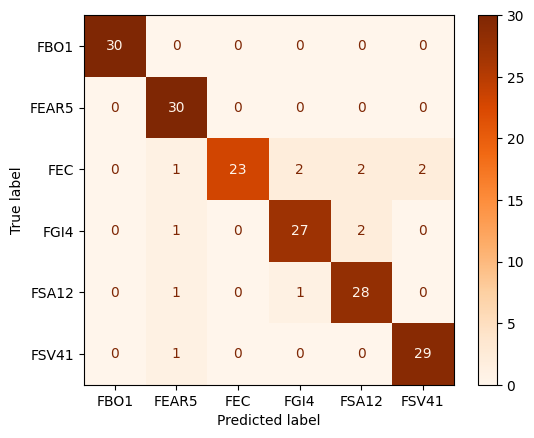

In [9]:
# KNN test

from sklearn.metrics import classification_report

with open("models/knn.pkl", 'rb') as file:
    knn = pickle.load(file)

knn_predictions = knn.predict(X)

report = classification_report(Y, knn_predictions)
print(report)

cm = confusion_matrix(Y, knn_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=classes)
confusion_matrix_display.plot(cmap="Oranges")

              precision    recall  f1-score   support

        FBO1       1.00      1.00      1.00        30
       FEAR5       0.97      1.00      0.98        30
         FEC       1.00      0.97      0.98        30
        FGI4       1.00      0.93      0.97        30
       FSA12       0.91      1.00      0.95        30
       FSV41       1.00      0.97      0.98        30

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



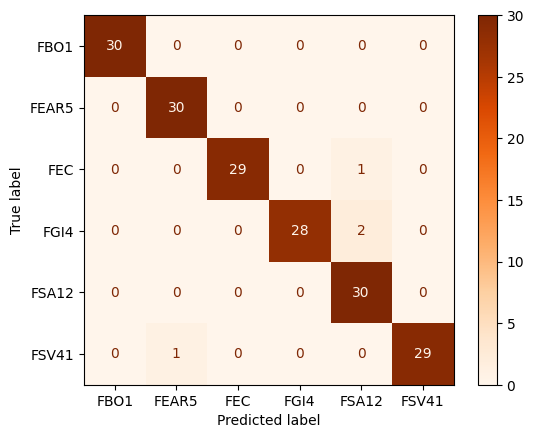

: 

In [ ]:
def correct_data(arr1, arr2, arr3):
    corrected = []
    
    for a, b, c in zip(arr1, arr2, arr3):
        if a == b or a == c:
            corrected.append(a)
        elif b == c:
            corrected.append(b)
        else:
            # If none match, decide what to do, e.g., keep the first value or use a placeholder
            corrected.append(a)  # You can modify this behavior as needed
    
    return np.array(corrected)

mixed_predictions = correct_data(svc_predictions, clf_predictions, knn_predictions)

report = classification_report(Y, mixed_predictions)
print(report)

cm = confusion_matrix(Y, mixed_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=classes)
confusion_matrix_display.plot(cmap="Oranges")